# Analysis

Importing and analysing a CIBSE weather file

## Setup

In [24]:
%matplotlib inline
import pandas as pd

## Import data

In [11]:
df=pd.read_csv('Nottingham_DSY1.csv', skiprows=31)

In [17]:
df.head()

,Year,Month,Day,Hour,PWC,Cloud,DBT,WBT,RH,Press,...,GSR,DSR,Alt,Dec,Cloud.1,DBT.1,WBT.1,Press.1,WD.1,WS.1
0,1996,1,1,1,-999,8,1.2,1.2,100,999.8,...,0.0,0.0,-59.8,-23.0,0,0,0,0,0,0
1,1996,1,1,2,-999,8,1.2,1.2,100,999.6,...,0.0,0.0,-56.3,-23.0,0,0,0,0,0,0
2,1996,1,1,3,-999,8,1.3,1.3,100,999.8,...,0.0,0.0,-49.8,-23.0,0,0,0,0,0,0
3,1996,1,1,4,-999,8,1.2,1.2,100,999.8,...,0.0,0.0,-41.7,-23.0,0,0,0,0,0,0
4,1996,1,1,5,-999,8,1.2,1.2,100,999.6,...,0.0,0.0,-32.9,-23.0,0,0,0,0,0,0


In [19]:
df.columns

Index(['Year', ' Month', ' Day', ' Hour', ' PWC', ' Cloud', ' DBT', ' WBT',
       ' RH', ' Press', ' WD', ' WS', ' GSR', ' DSR', ' Alt', ' Dec',
       ' Cloud.1', ' DBT.1', ' WBT.1', ' Press.1', ' WD.1', ' WS.1'],
      dtype='object')

In [46]:
df['timestamp']=pd.to_datetime(df.rename(columns={' Month':'Month',' Day':'Day',' Hour':'Hour'})[['Year','Month','Day','Hour']])
df=df.set_index('timestamp')
df.head()

,Year,Month,Day,Hour,PWC,Cloud,DBT,WBT,RH,Press,...,GSR,DSR,Alt,Dec,Cloud.1,DBT.1,WBT.1,Press.1,WD.1,WS.1
timestamp,,,,,,,,,,,,,,,,,,,,,
1996-01-01 01:00:00,1996,1,1,1,-999,8,1.2,1.2,100,999.8,...,0.0,0.0,-59.8,-23.0,0,0,0,0,0,0
1996-01-01 02:00:00,1996,1,1,2,-999,8,1.2,1.2,100,999.6,...,0.0,0.0,-56.3,-23.0,0,0,0,0,0,0
1996-01-01 03:00:00,1996,1,1,3,-999,8,1.3,1.3,100,999.8,...,0.0,0.0,-49.8,-23.0,0,0,0,0,0,0
1996-01-01 04:00:00,1996,1,1,4,-999,8,1.2,1.2,100,999.8,...,0.0,0.0,-41.7,-23.0,0,0,0,0,0,0
1996-01-01 05:00:00,1996,1,1,5,-999,8,1.2,1.2,100,999.6,...,0.0,0.0,-32.9,-23.0,0,0,0,0,0,0


## Plot raw DBT

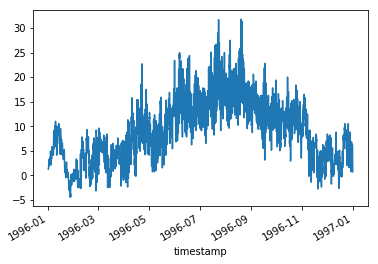

In [47]:
df[' DBT'].plot()

## Resample to daily totals

In [49]:
dbt=df[' DBT']
dbt.head()

timestamp
1996-01-01 01:00:00    1.2
1996-01-01 02:00:00    1.2
1996-01-01 03:00:00    1.3
1996-01-01 04:00:00    1.2
1996-01-01 05:00:00    1.2
Name:  DBT, dtype: float64

In [51]:
daily_dbt=dbt.resample('1D').mean()
daily_dbt.head()

timestamp
1996-01-01    2.030435
1996-01-02    2.650000
1996-01-03    3.791667
1996-01-04    3.433333
1996-01-05    5.095833
Freq: D, Name:  DBT, dtype: float64

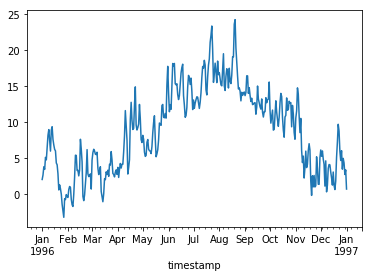

In [52]:
daily_dbt.plot()

## Hours above 25

In [63]:
for i in range(30):
    print(i, len(dbt[dbt>i]))

0 8182
1 7786
2 7432
3 6982
4 6549
5 6000
6 5498
7 5038
8 4598
9 4188
10 3766
11 3340
12 2861
13 2325
14 1851
15 1454
16 1108
17 864
18 671
19 506
20 388
21 287
22 210
23 147
24 105
25 75
26 53
27 34
28 27
29 18


In [5]:
pd

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
pd.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseSeries',
 'Term',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt64Index',
 'WidePanel',
 '_DeprecatedModule',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_tslib',
 '_version',
 'api',
 'bdate_range',
 'compat',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'descri